In [1]:
# %matplotlib widget
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np


Bad key backend.qt4 in file /home/lbondonneau/.config/matplotlib/matplotlibrc, line 6 ('backend.qt4        : PyQt4')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.5/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution


In [2]:
from NenuRaw_module import Rawtf

In [3]:
fn_raw = Path('/databf2/nenufar-tf/ES00/2022/02/20220228_154600_20220228_155400_B0809+74_TRACKING/B0809+74_TRACKING_20220228_154637_2.raw')

In [4]:
file_format = Rawtf(fn_raw, verbose=True)

int8 67043328
  blocksize_header  is: 67043328 -> 0.447 sec
  blocksize_file    is: 67043328
  overlap    is: 0
  nbit       is: 8
  head_size  is: 2316


In [5]:
block_num = 0
block = file_format.data['data'][block_num]
block.shape = (int(file_format.nschan_file / file_format.nof_polcpx), file_format.nchan_file, file_format.nof_polcpx)
nbin, nchan, npol = np.shape(block)
np.shape(block)

(87296, 192, 4)

In [6]:
# block = block.transpose((1, 0, 2))
# np.shape(block)

In [10]:
block_length = nbin * file_format.tbin
min_freq_res = file_format.chan_bw / nbin
print(f"Using a single block can go down to {min_freq_res * 1e6:.4f} Hz with fftlen of {nbin}")

Using a single block can go down to 2.2374 Hz with fftlen of 87296


In [8]:
test = np.fft.fft(block, axis=0)
test = test.transpose((1, 0, 2))
test = test.reshape((nbin * nchan, npol))
np.shape(test)

(16760832, 4)

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

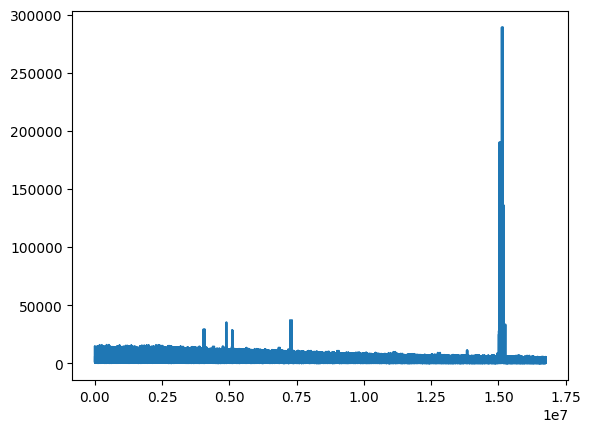

In [9]:

plt.plot(np.abs(test[:,0]) + np.abs(test[:,1]))
plt.show()